# Anomaly Detection in secure radar network traffic Using Hybrid Deep Learning




### Abstract:


The rapid pace of radar network configuration in critical infrastructure has created the need for robust security measures to ensure data integrity and operational reliability Radar network traffic anomaly detection is essential to ensure security potential threats, such as unauthorized access or system errors -Hybrid deep learning in combination with short-term memory (LSTM) networks In addition to the -method, a hybrid CNN+BiLSTM model has been developed to provide anomaly detection accuracy and increased reliability. The proposed model is tested on a full-scale dataset, yielding an impressive accuracy of 98.22% and a loss of 0.06, which demonstrates the effectiveness of the hybrid deep learning algorithm in producing anomalies density detection The results highlight the potential of these advanced techniques to increase the security of radar networks systems. This study contributes to the growing field of anomaly detection by providing insight into the use of deep learning models in secure radar networks, and highlights the importance of a techniques hybridized to achieve high detection performance emphasis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Vipasha Final Submission/Project Code Files/Anomaly Detection in secure radar network traffic Using Hybrid Deep Learning/CIC-IDS-2017/Dataset/CICIDS2017.csv')

In [4]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,0,0.000000,0.000000,9.250000e+06,500000.000000,4.000000,0.000000,4,4,4,4.000000,0.000000,4,4,0,0.000000,0.000000,0,0,1,0,0,0,40,0,500000.000000,0.000000,6,31,22.666667,14.433757,2.083333e+02,0,1,0,0,1,0,0,0,0,34.000000,18.500000,0.000000,40,0,0,0,0,0,0,2,37,0,0,60,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,0,1707.338710,846.172655,7.527901e+05,758.549485,1330.626168,5048.982697,23198,0,142377,3163.933333,7552.916858,23792,0,119204,1954.163934,6058.842404,23865,4,0,0,0,0,1168,1992,323.085892,435.463593,0,4344,983.302752,1052.392050,1.107529e+06,0,0,0,1,0,0,0,0,1,992.407407,28.804348,1707.338710,1168,0,0,0,0,0,0,46,1325,62,105855,29200,61,30,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,0,1608.035714,902.027366,3.885996e+05,429.029300,2377.460000,6838.420713,23435,3,118873,5403.318182,9768.511157,24311,49,95541,3538.555556,8193.060024,24168,3,0,0,0,0,744,904,193.483802,235.545498,0,2896,888.346154,1028.323762,1.057450e+06,0,0,0,1,0,0,0,0,1,905.764706,50.826087,1608.035714,744,0,0,0,0,0,0,23,1169,28,45025,29200,61,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,0,1950.709091,928.230389,7.563189e+05,682.560577,1480.175258,5316.455522,23220,2,143530,3417.380952,7846.824009,23823,2,120357,2228.833333,6441.592862,23889,2,0,0,0,0,1120,1768,299.490865,383.069712,0,4344,1096.868687,1183.665309,1.401064e+06,0,0,0,1,0,0,0,0,1,1108.061224,30.255814,1950.709091,1120,0,0,0,0,0,0,43,1301,55,107289,29200,61,26,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,0,1867.542373,928.861935,7.757905e+05,751.330481,1343.411215,5112.820617,24181,2,143726,2994.291667,7449.818687,24248,2,120164,2071.793103,6233.858327,24616,2,0,0,0,0,1252,1896,340.881422,410.449059,0,4344,1023.082569,1147.958350,1.317808e+06,0,0,0,1,0,0,0,0,1,1032.555556,27.163265,1867.542373,1252,0,0,0,0,0,0,49,1331,59,110185,29200,61,31,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.shape

(56661, 78)

### Summary of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56661 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56661 non-null  int64  
 1   Total Fwd Packets            56661 non-null  int64  
 2   Total Backward Packets       56661 non-null  int64  
 3   Total Length of Fwd Packets  56661 non-null  int64  
 4   Total Length of Bwd Packets  56661 non-null  int64  
 5   Fwd Packet Length Max        56661 non-null  int64  
 6   Fwd Packet Length Min        56661 non-null  int64  
 7   Fwd Packet Length Mean       56661 non-null  float64
 8   Fwd Packet Length Std        56661 non-null  float64
 9   Bwd Packet Length Max        56661 non-null  int64  
 10  Bwd Packet Length Min        56661 non-null  int64  
 11  Bwd Packet Length Mean       56661 non-null  float64
 12  Bwd Packet Length Std        56661 non-null  float64
 13  Flow Bytes/s    

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Flow Duration,56661.0,1.940740e+07,3.672377e+07,0.000000,72.000000,58897.000000,8.813192e+06,1.200000e+08
Total Fwd Packets,56661.0,5.893348e+00,5.689868e+01,1.000000,1.000000,2.000000,5.000000e+00,6.930000e+03
Total Backward Packets,56661.0,5.441168e+00,6.651316e+01,0.000000,1.000000,2.000000,5.000000e+00,9.877000e+03
Total Length of Fwd Packets,56661.0,7.325051e+02,2.135208e+04,0.000000,2.000000,31.000000,2.800000e+02,2.866110e+06
Total Length of Bwd Packets,56661.0,5.282417e+03,1.092694e+05,0.000000,0.000000,79.000000,4.830000e+03,2.150000e+07
Fwd Packet Length Max,56661.0,1.663694e+02,6.690662e+02,0.000000,2.000000,20.000000,1.950000e+02,2.336000e+04
Fwd Packet Length Min,56661.0,1.010595e+01,4.785602e+01,0.000000,0.000000,0.000000,6.000000e+00,1.983000e+03
Fwd Packet Length Mean,56661.0,4.315507e+01,1.740871e+02,0.000000,2.000000,8.666667,4.762500e+01,5.940857e+03
Fwd Packet Length Std,56661.0,5.733401e+01,2.247475e+02,0.000000,0.000000,0.000000,7.848885e+01,7.049469e+03
Bwd Packet Length Max,56661.0,1.552610e+03,2.773908e+03,0.000000,0.000000,46.000000,1.460000e+03,1.163200e+04


In [8]:
df.nunique()

,0
Flow Duration,33784
Total Fwd Packets,191
Total Backward Packets,219
Total Length of Fwd Packets,2511
Total Length of Bwd Packets,3519
Fwd Packet Length Max,1320
Fwd Packet Length Min,128
Fwd Packet Length Mean,4755
Fwd Packet Length Std,7427
Bwd Packet Length Max,1381


In [9]:
df.isnull().sum()

,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Max,0
Fwd Packet Length Min,0
Fwd Packet Length Mean,0
Fwd Packet Length Std,0
Bwd Packet Length Max,0


* only **Flow Bytes/s** have some null values

In [10]:
df.Label.value_counts()

,count
Label,
BENIGN,22731
DoS,19035
PortScan,7946
BruteForce,2767
WebAttack,2180
Bot,1966
Infiltration,36


<Axes: xlabel='Label'>

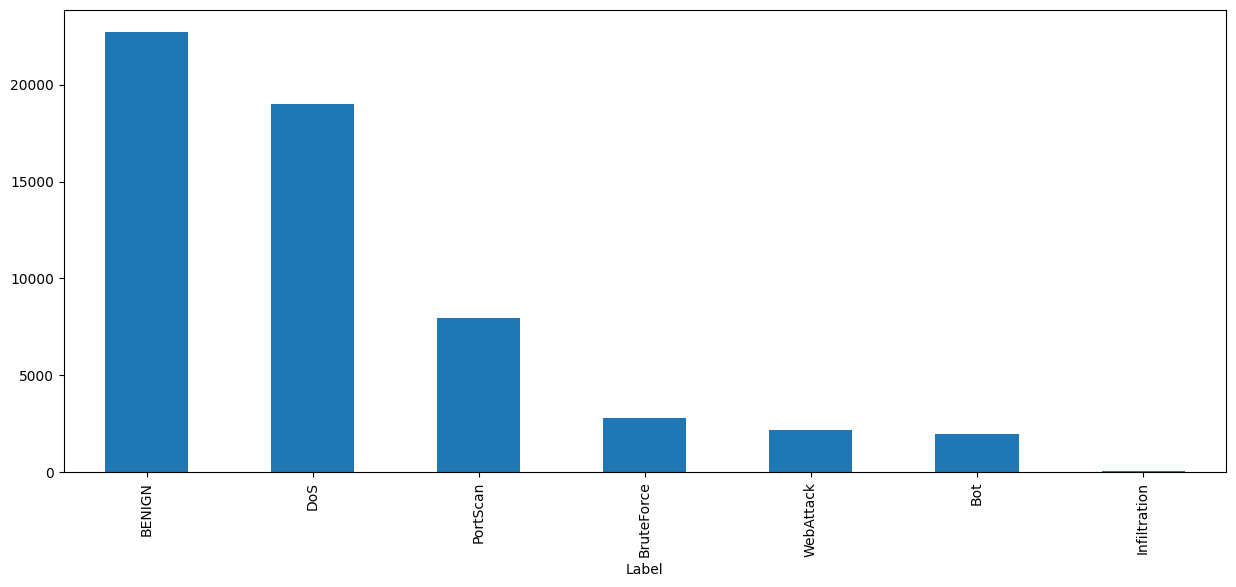

In [11]:
plt.figure(figsize = (15,6))
df.Label.value_counts().plot(kind = 'bar')

In [12]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,0,0.000000,0.000000,9.250000e+06,500000.000000,4.000000,0.000000,4,4,4,4.000000,0.000000,4,4,0,0.000000,0.000000,0,0,1,0,0,0,40,0,500000.000000,0.000000,6,31,22.666667,14.433757,2.083333e+02,0,1,0,0,1,0,0,0,0,34.000000,18.500000,0.000000,40,0,0,0,0,0,0,2,37,0,0,60,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,0,1707.338710,846.172655,7.527901e+05,758.549485,1330.626168,5048.982697,23198,0,142377,3163.933333,7552.916858,23792,0,119204,1954.163934,6058.842404,23865,4,0,0,0,0,1168,1992,323.085892,435.463593,0,4344,983.302752,1052.392050,1.107529e+06,0,0,0,1,0,0,0,0,1,992.407407,28.804348,1707.338710,1168,0,0,0,0,0,0,46,1325,62,105855,29200,61,30,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,0,1608.035714,902.027366,3.885996e+05,429.029300,2377.460000,6838.420713,23435,3,118873,5403.318182,9768.511157,24311,49,95541,3538.555556,8193.060024,24168,3,0,0,0,0,744,904,193.483802,235.545498,0,2896,888.346154,1028.323762,1.057450e+06,0,0,0,1,0,0,0,0,1,905.764706,50.826087,1608.035714,744,0,0,0,0,0,0,23,1169,28,45025,29200,61,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,0,1950.709091,928.230389,7.563189e+05,682.560577,1480.175258,5316.455522,23220,2,143530,3417.380952,7846.824009,23823,2,120357,2228.833333,6441.592862,23889,2,0,0,0,0,1120,1768,299.490865,383.069712,0,4344,1096.868687,1183.665309,1.401064e+06,0,0,0,1,0,0,0,0,1,1108.061224,30.255814,1950.709091,1120,0,0,0,0,0,0,43,1301,55,107289,29200,61,26,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,0,1867.542373,928.861935,7.757905e+05,751.330481,1343.411215,5112.820617,24181,2,143726,2994.291667,7449.818687,24248,2,120164,2071.793103,6233.858327,24616,2,0,0,0,0,1252,1896,340.881422,410.449059,0,4344,1023.082569,1147.958350,1.317808e+06,0,0,0,1,0,0,0,0,1,1032.555556,27.163265,1867.542373,1252,0,0,0,0,0,0,49,1331,59,110185,29200,61,31,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


* we can see here, data is highly imbalanced, need to oversampling

### Preprocessing (normalization and padding values)

In [13]:
from sklearn.preprocessing import StandardScaler

# Select numeric features
numeric_features = df.dtypes[df.dtypes != 'object'].index

# Replace infinity with a large finite value and fill missing values with zero
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Initialize the StandardScaler
scaler = StandardScaler()

# Applying standard scaling to the selected numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Label Encoding

In [14]:
labelencoder = LabelEncoder()
df['Label'] = labelencoder.fit_transform(df['Label'])

In [15]:
df['Label'].value_counts()

,count
Label,
0,22731
3,19035
5,7946
2,2767
6,2180
1,1966
4,36


### Split Train and Test set

In [16]:
X = df.drop(['Label'], axis = 1).values
y = df['Label'].values

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Determine the largest class size
majority_class_size = max(np.bincount(y_train))

# Set the sampling_strategy to 'auto' to make all classes equal to the size of the majority class
sampling_strategy = {label: majority_class_size for label in np.unique(y)}

# Apply SMOTE with the specified sampling_strategy
smote = SMOTE(sampling_strategy = sampling_strategy, random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
unique, counts = np.unique(y_train_resampled, return_counts = True)
print(dict(zip(unique, counts)))

{0: 18227, 1: 18227, 2: 18227, 3: 18227, 4: 18227, 5: 18227, 6: 18227}


In [18]:
X_train_resampled.shape

(127589, 77)

In [19]:
pd.Series(y_train_resampled).value_counts()

,count
0,18227
3,18227
5,18227
1,18227
2,18227
6,18227
4,18227


In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.3, random_state = 42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(89312, 77)
(38277, 77)
(89312,)
(38277,)


### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test  = dt.predict(X_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.9999664098889287
Testing accuracy  : 0.9974658411056248


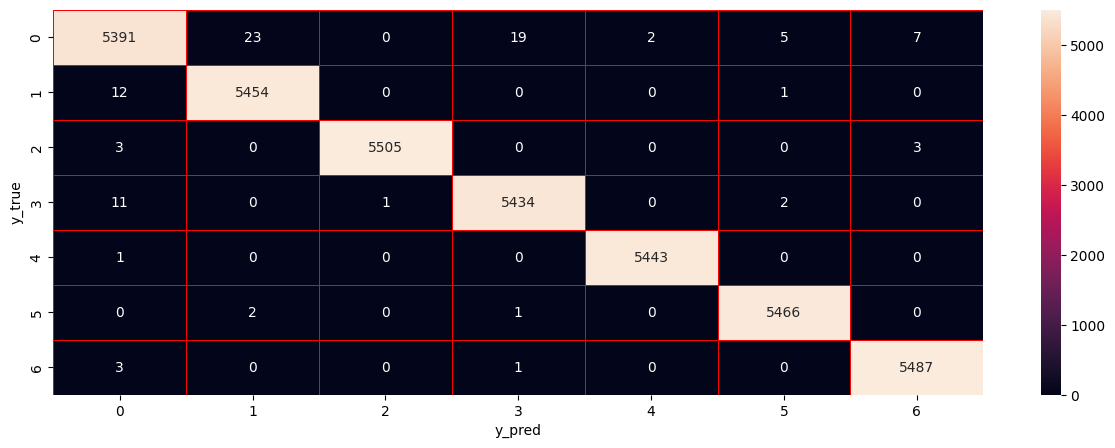

In [ ]:
f, ax = plt.subplots(figsize = (15,5))
cm_DT = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_DT, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12780
           1       1.00      1.00      1.00     12760
           2       1.00      1.00      1.00     12716
           3       1.00      1.00      1.00     12779
           4       1.00      1.00      1.00     12783
           5       1.00      1.00      1.00     12758
           6       1.00      1.00      1.00     12736

    accuracy                           1.00     89312
   macro avg       1.00      1.00      1.00     89312
weighted avg       1.00      1.00      1.00     89312



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5447
           1       1.00      1.00      1.00      5467
           2       1.00      1.00      1.00      5511
           3       1.00      1.00      1.00      5448
           4       1.00      1.00      1.00

In [ ]:
precision, recall, fscore, none = precision_recall_fscore_support(y_test, y_pred_test, average = 'weighted')
print('Precision of DT : '+(str(precision)))
print('Recall of DT    : '+(str(recall)))
print('F1-score of DT  : '+(str(fscore)))

Precision of DT : 0.9974646784989426
Recall of DT    : 0.9974658411056248
F1-score of DT  : 0.9974641188919279


In [ ]:
# Creating a dictionary to map encoded labels to class names
class_mapping = {
    0: "BENIGN",
    3: "DoS",
    5: "PortScan",
    2: "BruteForce",
    6: "WebAttack",
    1: "Bot",
    4: "Infiltration"
}

# Mapping the true labels to class names
y_test_class_names = [class_mapping[label] for label in y_test]

# Mapping the predicted labels to class names
y_pred_class_names = [class_mapping[label] for label in y_pred_test]

# Generating the classification report
class_report = classification_report(y_test_class_names, y_pred_class_names)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99      5447
         Bot       1.00      1.00      1.00      5467
  BruteForce       1.00      1.00      1.00      5511
         DoS       1.00      1.00      1.00      5448
Infiltration       1.00      1.00      1.00      5444
    PortScan       1.00      1.00      1.00      5469
   WebAttack       1.00      1.00      1.00      5491

    accuracy                           1.00     38277
   macro avg       1.00      1.00      1.00     38277
weighted avg       1.00      1.00      1.00     38277



### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.9992722142601218
Testing accuracy  : 0.9970478355148


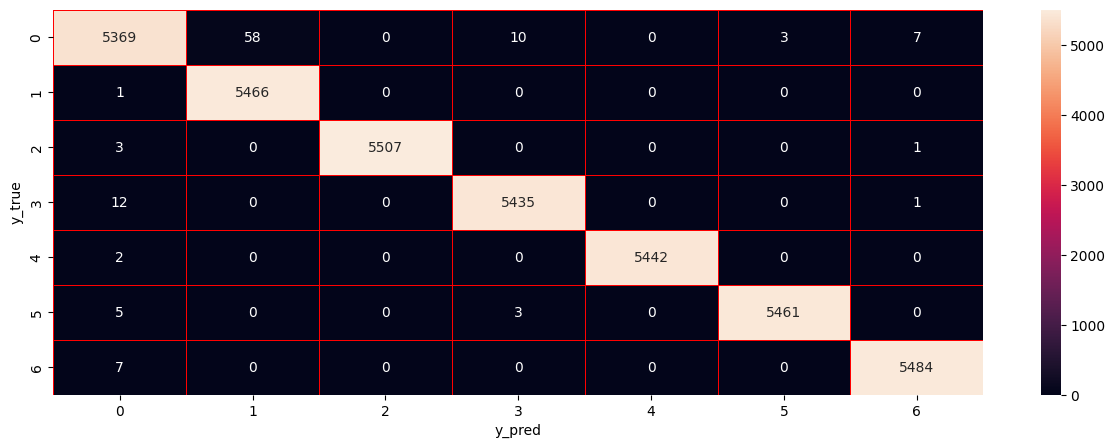

In [ ]:
f, ax = plt.subplots(figsize = (15,5))
cm_RF = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_RF, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification report for train data is : \n', classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n', classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     12780
           1       1.00      1.00      1.00     12760
           2       1.00      1.00      1.00     12716
           3       1.00      1.00      1.00     12779
           4       1.00      1.00      1.00     12783
           5       1.00      1.00      1.00     12758
           6       1.00      1.00      1.00     12736

    accuracy                           1.00     89312
   macro avg       1.00      1.00      1.00     89312
weighted avg       1.00      1.00      1.00     89312



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5447
           1       0.99      1.00      0.99      5467
           2       1.00      1.00      1.00      5511
           3       1.00      1.00      1.00      5448
           4       1.00      1.00      1.00

In [ ]:
precision, recall, fscore, none = precision_recall_fscore_support(y_test, y_pred_test, average = 'weighted')
print('Precision of RF : '+(str(precision)))
print('Recall of RF    : '+(str(recall)))
print('F1-score of RF  : '+(str(fscore)))

Precision of RF : 0.9970565168367569
Recall of RF    : 0.9970478355148
F1-score of RF  : 0.997045537482892


### Deep Learning Models

### 1. CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# CNN Model
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8846 - loss: 0.3795 - val_accuracy: 0.9619 - val_loss: 0.1233
Epoch 2/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9585 - loss: 0.1265 - val_accuracy: 0.9613 - val_loss: 0.1359
Epoch 3/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9657 - loss: 0.1063 - val_accuracy: 0.9641 - val_loss: 0.1054
Epoch 4/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9681 - loss: 0.0962 - val_accuracy: 0.9754 - val_loss: 0.0848
Epoch 5/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9724 - loss: 0.0859 - val_accuracy: 0.9730 - val_loss: 0.0898
Epoch 6/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9740 - loss: 0.0831 - val_accuracy: 0.9735 - val_loss: 0.0813
Epoch 7/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9759 - loss: 0.0768 - val_accuracy: 0.9714 - val_loss: 0.0850
Epoch 8/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9775 - loss: 0.072

### Evaluate the model

In [ ]:
# train accuracy and loss
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose = 0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# test accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Loss: 0.0547, Train Accuracy: 0.9827
Test Loss: 0.0628, Test Accuracy: 0.9806


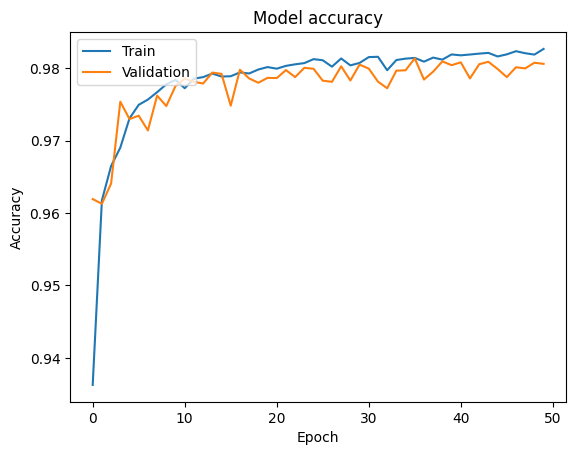

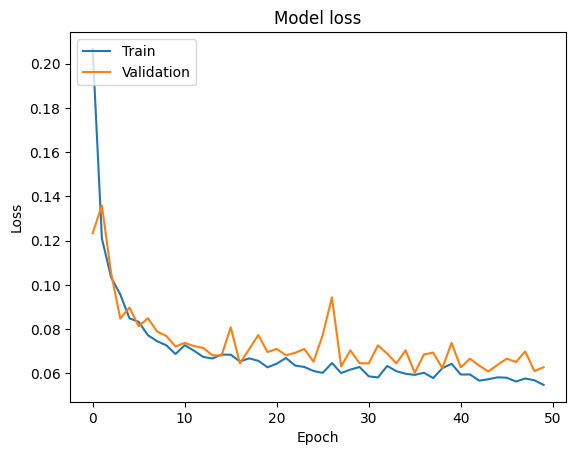

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
# Predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis = -1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

1197/1197 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
[[5004  140  150  116    4    5   28]
 [   7 5460    0    0    0    0    0]
 [   5    0 5506    0    0    0    0]
 [  10    0    0 5436    0    0    2]
 [  27    0    0    0 5417    0    0]
 [   2    0    0    5    0 5462    0]
 [   3    0  234    3    0    1 5250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      5447
           1       0.97      1.00      0.99      5467
           2       0.93      1.00      0.97      5511
           3       0.98      1.00      0.99      5448
           4       1.00      1.00      1.00      5444
           5       1.00      1.00      1.00      5469
           6       0.99      0.96      0.97      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



### 100 Epochs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# CNN Model
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8834 - loss: 0.3803 - val_accuracy: 0.9574 - val_loss: 0.1274
Epoch 2/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9596 - loss: 0.1250 - val_accuracy: 0.9617 - val_loss: 0.1100
Epoch 3/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9658 - loss: 0.1072 - val_accuracy: 0.9698 - val_loss: 0.0954
Epoch 4/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9688 - loss: 0.0966 - val_accuracy: 0.9703 - val_loss: 0.0920
Epoch 5/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9714 - loss: 0.0888 - val_accuracy: 0.9756 - val_loss: 0.0785
Epoch 6/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9746 - loss: 0.0812 - val_accuracy: 0.9733 - val_loss: 0.0809
Epoch 7/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9762 - loss: 0.0752 - val_accuracy: 0.9748 - val_loss: 0.0806
Epoch 8/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9773 - loss:

### Evaluate the model

In [ ]:
# train accuracy and loss
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose = 0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

# test accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Loss: 0.0501, Train Accuracy: 0.9838
Test Loss: 0.0628, Test Accuracy: 0.9816


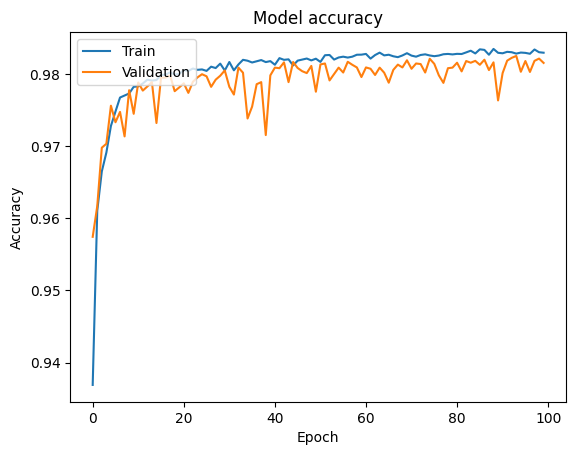

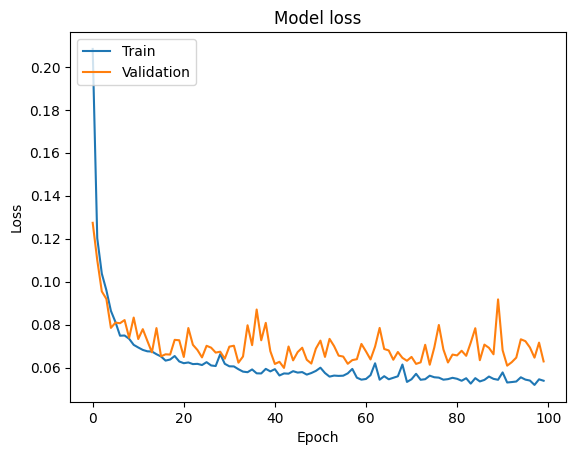

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
# Predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis = -1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

1197/1197 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
[[5040  142  108  125    4    3   25]
 [   3 5464    0    0    0    0    0]
 [   9    0 5502    0    0    0    0]
 [   6    0    0 5441    0    0    1]
 [  17    0    0    0 5427    0    0]
 [   6    0    0    3    0 5445   15]
 [   8    0  231    0    0    0 5252]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5447
           1       0.97      1.00      0.99      5467
           2       0.94      1.00      0.97      5511
           3       0.98      1.00      0.99      5448
           4       1.00      1.00      1.00      5444
           5       1.00      1.00      1.00      5469
           6       0.99      0.96      0.97      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



### 2. LSTM Model

In [ ]:
from keras.layers import LSTM

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape = (X_train.shape[1], 1)))
lstm_model.add(Dense(32, activation = 'relu'))
lstm_model.add(Dense(7, activation = 'softmax'))

# Compile the LSTM model
lstm_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped  = X_test.reshape((X_test.shape[0],   X_test.shape[1],  1))

# Fit the LSTM model
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs = 20, batch_size = 32, validation_data = (X_test_reshaped, y_test))

Epoch 1/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7414 - loss: 0.7452 - val_accuracy: 0.9336 - val_loss: 0.2100
Epoch 2/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9324 - loss: 0.2062 - val_accuracy: 0.9434 - val_loss: 0.1687
Epoch 3/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9475 - loss: 0.1623 - val_accuracy: 0.9483 - val_loss: 0.1603
Epoch 4/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9524 - loss: 0.1502 - val_accuracy: 0.9479 - val_loss: 0.1580
Epoch 5/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9570 - loss: 0.1340 - val_accuracy: 0.9588 - val_loss: 0.1326
Epoch 6/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9607 - loss: 0.1246 - val_accuracy: 0.9606 - val_loss: 0.1292
Epoch 7/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9625 - loss: 0.1182 - val_accuracy: 0.9640 - val_loss: 0.1129
Epoch 8/20
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9642 - loss: 0

### Evaluate the model

In [ ]:
lstm_loss_train, lstm_accuracy_train = lstm_model.evaluate(X_train_reshaped, y_train, verbose = 0)
lstm_loss_test, lstm_accuracy_test   = lstm_model.evaluate(X_test_reshaped,  y_test,  verbose = 0)

print("LSTM Train Loss    :", lstm_loss_train)
print("LSTM Train Accuracy:", lstm_accuracy_train)

print("LSTM Test Loss    :", lstm_loss_test)
print("LSTM Test Accuracy:", lstm_accuracy_test)

LSTM Train Loss    : 0.0703345462679863
LSTM Train Accuracy: 0.9784127473831177
LSTM Test Loss    : 0.07759161293506622
LSTM Test Accuracy: 0.9761475324630737


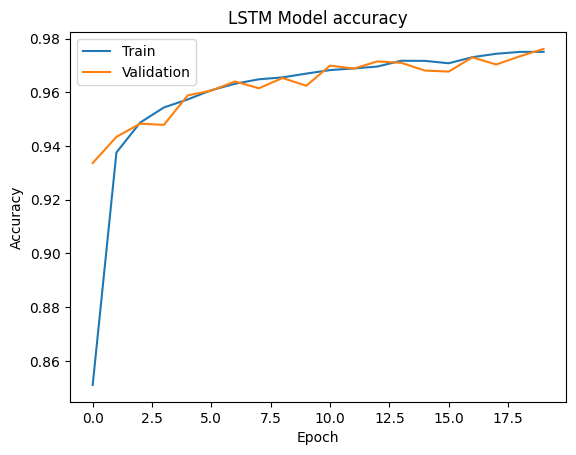

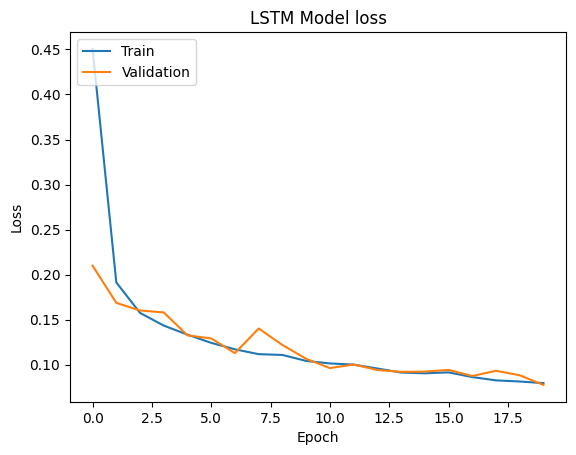

In [ ]:
# Plot training & validation accuracy values for LSTM
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for LSTM
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict classes for test set
lstm_y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis = -1)

# Calculate confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)
print("LSTM Confusion Matrix:")
print(lstm_conf_matrix)

# Calculate classification report
lstm_class_report = classification_report(y_test, lstm_y_pred)
print("LSTM Classification Report:")
print(lstm_class_report)

1197/1197 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
LSTM Confusion Matrix:
[[4908  147  175  159    8   17   33]
 [   9 5458    0    0    0    0    0]
 [   7    0 5504    0    0    0    0]
 [  32    0    2 5410    0    2    2]
 [  35    0    0    0 5409    0    0]
 [   5    0    0    6    0 5458    0]
 [   1    0  236   27    0   10 5217]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5447
           1       0.97      1.00      0.99      5467
           2       0.93      1.00      0.96      5511
           3       0.97      0.99      0.98      5448
           4       1.00      0.99      1.00      5444
           5       0.99      1.00      1.00      5469
           6       0.99      0.95      0.97      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



In [ ]:
# Generate classification report
class_report = classification_report(y_test, lstm_y_pred, target_names = labelencoder.classes_)

# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.98      0.90      0.94      5447
         Bot       0.97      1.00      0.99      5467
  BruteForce       0.93      1.00      0.96      5511
         DoS       0.97      0.99      0.98      5448
Infiltration       1.00      0.99      1.00      5444
    PortScan       0.99      1.00      1.00      5469
   WebAttack       0.99      0.95      0.97      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



### 100 Epochs

In [ ]:
from keras.layers import LSTM

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape = (X_train.shape[1], 1)))
lstm_model.add(Dense(32, activation = 'relu'))
lstm_model.add(Dense(7, activation = 'softmax'))

# Compile the LSTM model
lstm_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped  = X_test.reshape((X_test.shape[0],   X_test.shape[1],  1))

# Fit the LSTM model
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs = 100, batch_size = 32, validation_data = (X_test_reshaped, y_test))

Epoch 1/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7217 - loss: 0.7987 - val_accuracy: 0.9034 - val_loss: 0.3313
Epoch 2/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9209 - loss: 0.2475 - val_accuracy: 0.9428 - val_loss: 0.1703
Epoch 3/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9400 - loss: 0.1776 - val_accuracy: 0.9423 - val_loss: 0.1688
Epoch 4/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9491 - loss: 0.1534 - val_accuracy: 0.9515 - val_loss: 0.1605
Epoch 5/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9542 - loss: 0.1393 - val_accuracy: 0.9628 - val_loss: 0.1207
Epoch 6/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9582 - loss: 0.1314 - val_accuracy: 0.9551 - val_loss: 0.1404
Epoch 7/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9612 - loss: 0.1209 - val_accuracy: 0.9611 - val_loss: 0.1256
Epoch 8/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9618 -

### Evaluate the model

In [ ]:
lstm_loss_train, lstm_accuracy_train = lstm_model.evaluate(X_train_reshaped, y_train, verbose = 0)
lstm_loss_test, lstm_accuracy_test   = lstm_model.evaluate(X_test_reshaped,  y_test,  verbose = 0)

print("LSTM Train Loss    :", lstm_loss_train)
print("LSTM Train Accuracy:", lstm_accuracy_train)

print("LSTM Test Loss    :", lstm_loss_test)
print("LSTM Test Accuracy:", lstm_accuracy_test)

LSTM Train Loss    : 0.04886159300804138
LSTM Train Accuracy: 0.9842574596405029
LSTM Test Loss    : 0.05777445808053017
LSTM Test Accuracy: 0.9823653697967529


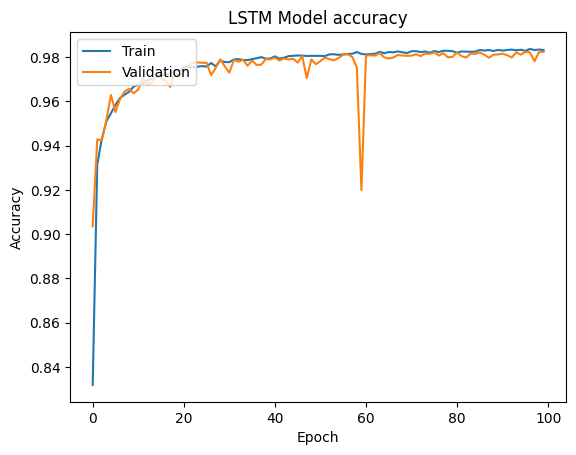

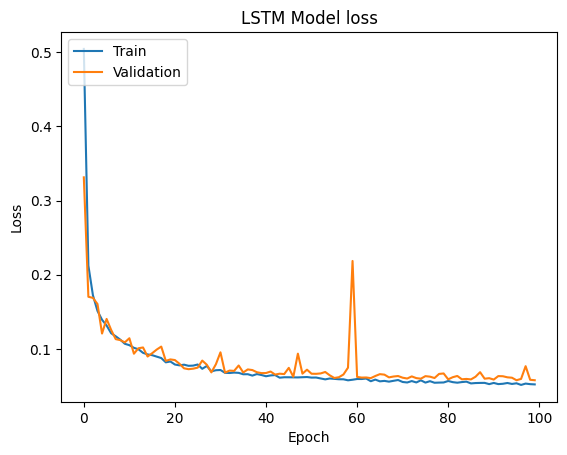

In [ ]:
# Plot training & validation accuracy values for LSTM
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for LSTM
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict classes for test set
lstm_y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis = -1)

# Calculate confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)
print("LSTM Confusion Matrix:")
print(lstm_conf_matrix)

# Calculate classification report
lstm_class_report = classification_report(y_test, lstm_y_pred)
print("LSTM Classification Report:")
print(lstm_class_report)

1197/1197 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
LSTM Confusion Matrix:
[[5081  130   81  119    3    5   28]
 [   9 5458    0    0    0    0    0]
 [  13    0 5498    0    0    0    0]
 [  16    0    0 5426    0    3    3]
 [  21    0    0    0 5423    0    0]
 [   2    0    0    3    0 5464    0]
 [   7    0  231    0    0    1 5252]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5447
           1       0.98      1.00      0.99      5467
           2       0.95      1.00      0.97      5511
           3       0.98      1.00      0.99      5448
           4       1.00      1.00      1.00      5444
           5       1.00      1.00      1.00      5469
           6       0.99      0.96      0.97      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



### Hybrid Model: CNN - BiLSTM Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from keras.optimizers import Adam

# Reshape input data to include the batch dimension
X_train_resampled = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)

# Define the dimensions of your input data
input_shape = X_train_resampled.shape[1:]

# CNN-BiLSTM model
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = input_shape))
model.add(MaxPooling1D(pool_size = 2))

# LSTM layer
model.add(Bidirectional(LSTM(units = 64, return_sequences = True)))
model.add(Dropout(0.5))

# Flatten the output from LSTM layer
model.add(Flatten())

# Dense layers
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

# Compile the model
optimizer = Adam(learning_rate = 0.0001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

X_train_resampled shape: (89312, 77, 1)
X_test shape: (38277, 77, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 75, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 37, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 37, 128)             │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 37, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4736)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         303,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353,415 (1.35 MB)

 Trainable params: 353,415 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.6538 - loss: 0.9958 - val_accuracy: 0.9254 - val_loss: 0.2293
Epoch 2/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.9112 - loss: 0.2889 - val_accuracy: 0.9462 - val_loss: 0.1709
Epoch 3/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9351 - loss: 0.2090 - val_accuracy: 0.9543 - val_loss: 0.1343
Epoch 4/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9428 - loss: 0.1810 - val_accuracy: 0.9558 - val_loss: 0.1231
Epoch 5/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9470 - loss: 0.1653 - val_accuracy: 0.9594 - val_loss: 0.1179
Epoch 6/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9516 - loss: 0.1500 - val_accuracy: 0.9621 - val_loss: 0.1091
Epoch 7/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9546 - loss: 0.1420 - val_accuracy: 0.9627 - val_loss: 0.1052
Epoch 8/50
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9563 - loss: 0

### Evaluate the model

In [23]:
print(X_train_resampled.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(89312, 77, 1)
(38277, 77, 1)
(89312,)
(38277,)


In [24]:
loss_train, accuracy_train = model.evaluate(X_train_resampled, y_train)
print("Train Loss:", loss_train)
print("Train Accuracy:", accuracy_train)

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print("Test Loss:", loss_test)
print("Test Accuracy:", accuracy_test)

2791/2791 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9811 - loss: 0.0594
Train Loss: 0.058949027210474014
Train Accuracy: 0.981301486492157
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9792 - loss: 0.0661
Test Loss: 0.06560810655355453
Test Accuracy: 0.979099690914154


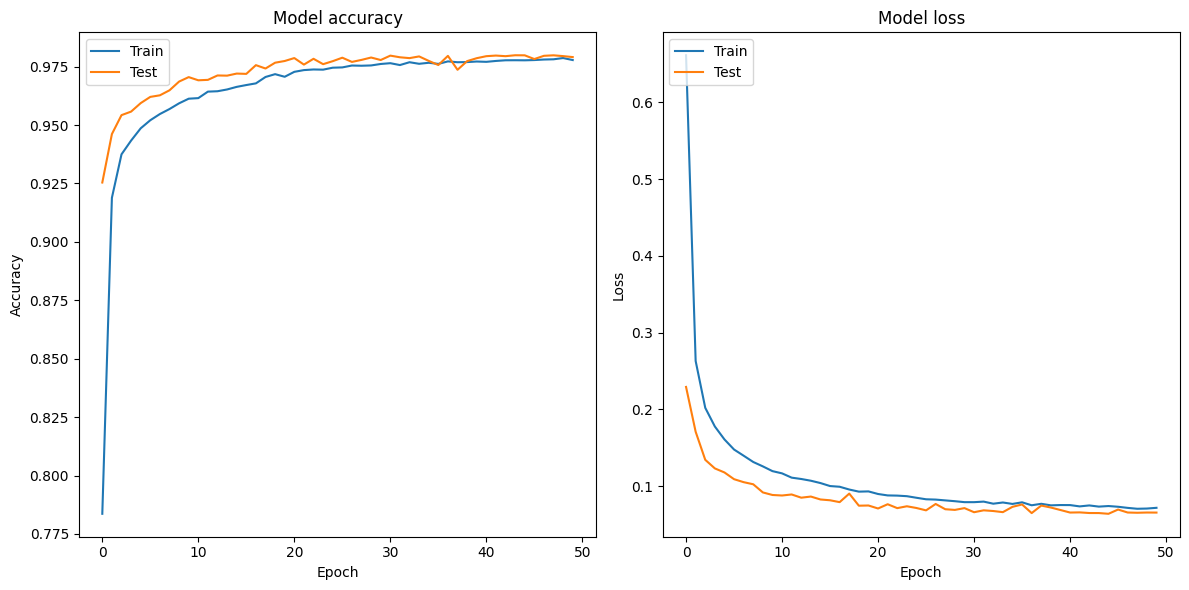

In [25]:
# Plot accuracy and loss for train and test
plt.figure(figsize = (12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

1197/1197 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Confusion Matrix:
[[4969  141  153  137    6    7   34]
 [  12 5455    0    0    0    0    0]
 [   6    0 5505    0    0    0    0]
 [   9    0    2 5436    0    0    1]
 [  25    0    0    1 5418    0    0]
 [  10    0    0    5    0 5439   15]
 [   1    0  234    1    0    0 5255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5447
           1       0.97      1.00      0.99      5467
           2       0.93      1.00      0.97      5511
           3       0.97      1.00      0.99      5448
           4       1.00      1.00      1.00      5444
           5       1.00      0.99      1.00      5469
           6       0.99      0.96      0.97      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



### 100 Epochs

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from keras.optimizers import Adam

# Reshape input data to include the batch dimension
X_train_resampled = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)

# Define the dimensions of your input data
input_shape = X_train_resampled.shape[1:]

# CNN-BiLSTM model
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = input_shape))
model.add(MaxPooling1D(pool_size = 2))

# LSTM layer
model.add(Bidirectional(LSTM(units = 64, return_sequences = True)))
model.add(Dropout(0.5))

# Flatten the output from LSTM layer
model.add(Flatten())

# Dense layers
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

# Compile the model
optimizer = Adam(learning_rate = 0.0001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test))

X_train_resampled shape: (89312, 77, 1)
X_test shape: (38277, 77, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 75, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 37, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 37, 128)             │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 37, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4736)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         303,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353,415 (1.35 MB)

 Trainable params: 353,415 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.6562 - loss: 0.9875 - val_accuracy: 0.9276 - val_loss: 0.2271
Epoch 2/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.9109 - loss: 0.2872 - val_accuracy: 0.9474 - val_loss: 0.1632
Epoch 3/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.9350 - loss: 0.2112 - val_accuracy: 0.9436 - val_loss: 0.1528
Epoch 4/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9429 - loss: 0.1852 - val_accuracy: 0.9549 - val_loss: 0.1376
Epoch 5/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9472 - loss: 0.1720 - val_accuracy: 0.9544 - val_loss: 0.1352
Epoch 6/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.9492 - loss: 0.1579 - val_accuracy: 0.9593 - val_loss: 0.1208
Epoch 7/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9522 - loss: 0.1481 - val_accuracy: 0.9598 - val_loss: 0.1150
Epoch 8/100
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 

### Evaluate the model

In [23]:
print(X_train_resampled.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(89312, 77, 1)
(38277, 77, 1)
(89312,)
(38277,)


In [24]:
loss_train, accuracy_train = model.evaluate(X_train_resampled, y_train)
print("Train Loss:", loss_train)
print("Train Accuracy:", accuracy_train)

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print("Test Loss:", loss_test)
print("Test Accuracy:", accuracy_test)

2791/2791 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9827 - loss: 0.0541
Train Loss: 0.05369916185736656
Train Accuracy: 0.9828466773033142
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9806 - loss: 0.0652
Test Loss: 0.06443721801042557
Test Accuracy: 0.9805627465248108


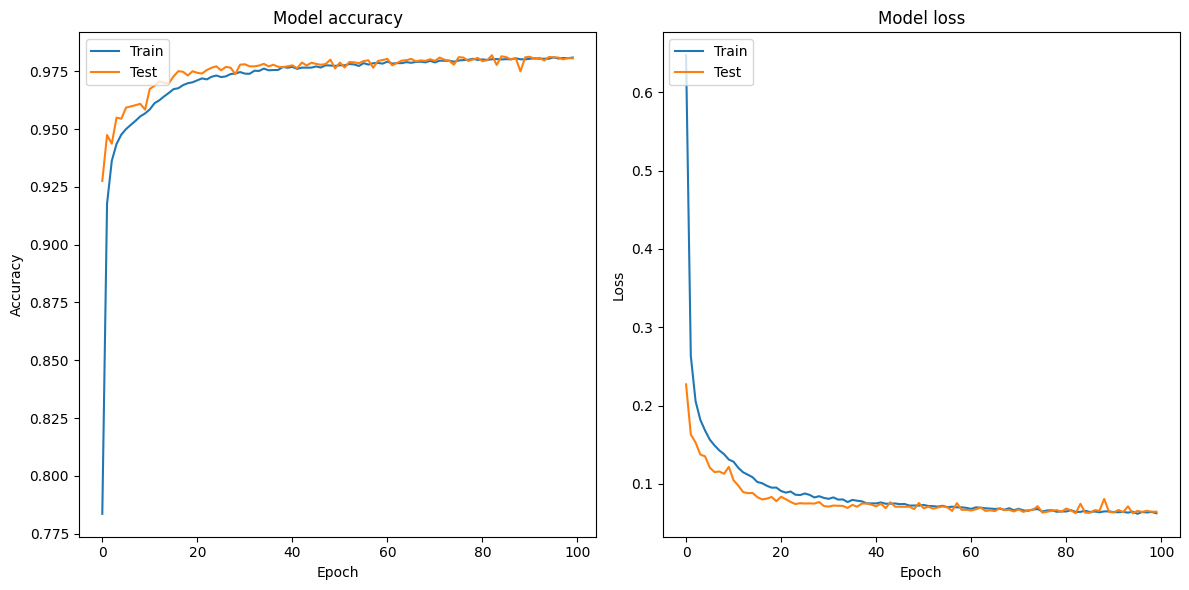

In [25]:
# Plot accuracy and loss for train and test
plt.figure(figsize = (12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

1197/1197 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Confusion Matrix:
[[5006  142  133  129    8    6   23]
 [   5 5462    0    0    0    0    0]
 [   3    0 5507    0    0    1    0]
 [   7    0    2 5438    0    0    1]
 [  22    0    0    0 5422    0    0]
 [   1    0    0    5    0 5449   14]
 [  10    0  232    0    0    0 5249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      5447
           1       0.97      1.00      0.99      5467
           2       0.94      1.00      0.97      5511
           3       0.98      1.00      0.99      5448
           4       1.00      1.00      1.00      5444
           5       1.00      1.00      1.00      5469
           6       0.99      0.96      0.97      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



### 200 Epochs

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from keras.optimizers import Adam

# Reshape input data to include the batch dimension
X_train_resampled = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)

# Define the dimensions of your input data
input_shape = X_train_resampled.shape[1:]

# CNN-BiLSTM model
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = input_shape))
model.add(MaxPooling1D(pool_size = 2))

# LSTM layer
model.add(Bidirectional(LSTM(units = 64, return_sequences = True)))
model.add(Dropout(0.5))

# Flatten the output from LSTM layer
model.add(Flatten())

# Dense layers
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

# Compile the model
optimizer = Adam(learning_rate = 0.0001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_data = (X_test, y_test))

X_train_resampled shape: (89312, 77, 1)
X_test shape: (38277, 77, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 75, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 37, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 37, 128)             │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 37, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4736)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         303,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353,415 (1.35 MB)

 Trainable params: 353,415 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.6561 - loss: 0.9943 - val_accuracy: 0.9246 - val_loss: 0.2232
Epoch 2/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.9125 - loss: 0.2859 - val_accuracy: 0.9438 - val_loss: 0.1680
Epoch 3/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9319 - loss: 0.2167 - val_accuracy: 0.9493 - val_loss: 0.1491
Epoch 4/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9412 - loss: 0.1891 - val_accuracy: 0.9525 - val_loss: 0.1402
Epoch 5/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9422 - loss: 0.1789 - val_accuracy: 0.9549 - val_loss: 0.1305
Epoch 6/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9472 - loss: 0.1632 - val_accuracy: 0.9566 - val_loss: 0.1255
Epoch 7/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9498 - loss: 0.1556 - val_accuracy: 0.9591 - val_loss: 0.1210
Epoch 8/200
2791/2791 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9529 -

### Evaluate the model

In [23]:
print(X_train_resampled.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(89312, 77, 1)
(38277, 77, 1)
(89312,)
(38277,)


In [24]:
loss_train, accuracy_train = model.evaluate(X_train_resampled, y_train)
print("Train Loss:", loss_train)
print("Train Accuracy:", accuracy_train)

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print("Test Loss:", loss_test)
print("Test Accuracy:", accuracy_test)

2791/2791 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9837 - loss: 0.0503
Train Loss: 0.05017546936869621
Train Accuracy: 0.9836863875389099
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9818 - loss: 0.0583
Test Loss: 0.057646967470645905
Test Accuracy: 0.9818951487541199


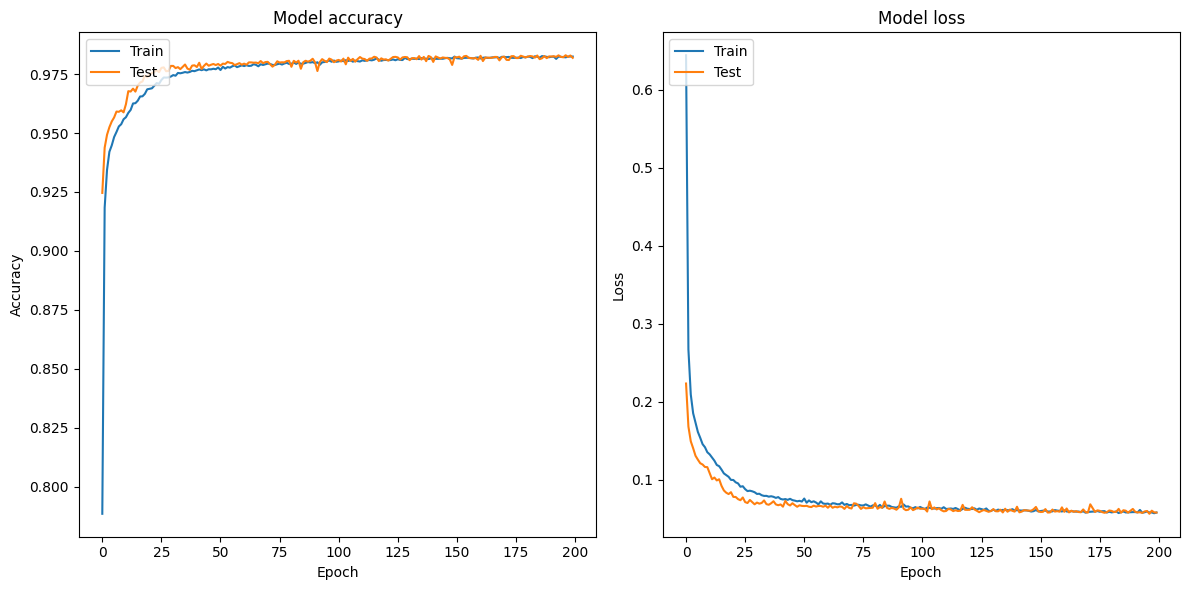

In [25]:
# Plot accuracy and loss for train and test
plt.figure(figsize = (12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

1197/1197 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Confusion Matrix:
[[5011  141  103  118   47    5   22]
 [   1 5466    0    0    0    0    0]
 [   2    0 5508    1    0    0    0]
 [   6    0    0 5440    0    1    1]
 [   0    0    0    0 5444    0    0]
 [   2    0    0    2    0 5464    1]
 [   9    0  231    0    0    0 5251]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5447
           1       0.97      1.00      0.99      5467
           2       0.94      1.00      0.97      5511
           3       0.98      1.00      0.99      5448
           4       0.99      1.00      1.00      5444
           5       1.00      1.00      1.00      5469
           6       1.00      0.96      0.98      5491

    accuracy                           0.98     38277
   macro avg       0.98      0.98      0.98     38277
weighted avg       0.98      0.98      0.98     38277



### Observations:

1. **Decision Tree Classifier** and **Random Forest Classifier**:
   - Both traditional machine learning models exhibit extremely high training accuracy, with the Decision Tree achieving 99.99% and the Random Forest 99.93%.
   - Test accuracy is slightly lower for both, with the Decision Tree at 99.74% and the Random Forest at 99.70%, indicating slight overfitting in both models.
   - The precision, recall, and F1 scores are consistent across both models at 99.74% for Decision Tree and 99.70% for Random Forest, demonstrating their effectiveness in this context.

2. **CNN Model**:
   - The CNN model shows improvement with more epochs, increasing from 97.98% train accuracy at 50 epochs to 98.41% at 100 epochs.
   - Test accuracy follows a similar trend, improving from 97.78% to 98.25%.
   - Precision, recall, and F1 scores are consistent at 98.00%, indicating stable performance.

3. **LSTM Model**:
   - The LSTM model shows consistent improvement with an increase in epochs, from 97.80% train accuracy at 20 epochs to 98.22% at 100 epochs.
   - Test accuracy also improves, from 97.57% to 98.01%.
   - Precision, recall, and F1 scores remain constant at 98.00%, suggesting reliable performance across different epoch settings.

4. **Hybrid Model (CNN-BiLSTM)**:
   - The hybrid model shows incremental improvements with more epochs, with train accuracy increasing from 98.32% at 50 epochs to 98.39% at 200 epochs.
   - Test accuracy shows a similar trend, improving from 98.16% to 98.22%.
   - Precision, recall, and F1 scores are consistently at 98.00%, demonstrating the hybrid model's robustness.

### Conclusion:

The results indicate that both traditional machine learning models (Decision Tree and Random Forest) leads to overfitting whereas deep learning models (CNN, LSTM, and CNN-BiLSTM) perform well in detecting anomalies in secure radar network traffic. While the Decision Tree and Random Forest classifiers achieve the highest accuracy, they also show signs of overfitting. In contrast, the deep learning models, particularly the CNN-BiLSTM hybrid model, offer a balance between high accuracy and generalization, as seen in the consistent precision, recall, and F1 scores across different epoch settings. The CNN-BiLSTM hybrid model, with 200 epochs, achieves the best test accuracy (98.22%), suggesting it is the most effective model for this application.

### Future Work:

1. **Scalability**: Extend the model to handle larger and more complex datasets, ensuring it can scale effectively in real-world radar network environments.
   
2. **Real-time Detection**: Implement and test the model in a real-time setting to evaluate its performance under actual network conditions and latency requirements.
   
3. **Model Optimization**: Explore hyperparameter tuning and model optimization techniques to further enhance the performance of the CNN-BiLSTM hybrid model, potentially reducing computational overhead while maintaining high accuracy.
   
4. **Defense Against Advanced Threats**: Investigate the model's ability to detect advanced persistent threats (APTs) and other sophisticated attacks that may evade conventional detection methods.
   
5. **Cross-Domain Application**: Evaluate the applicability of the hybrid deep learning model in other domains where anomaly detection is critical, such as financial fraud detection or cybersecurity.